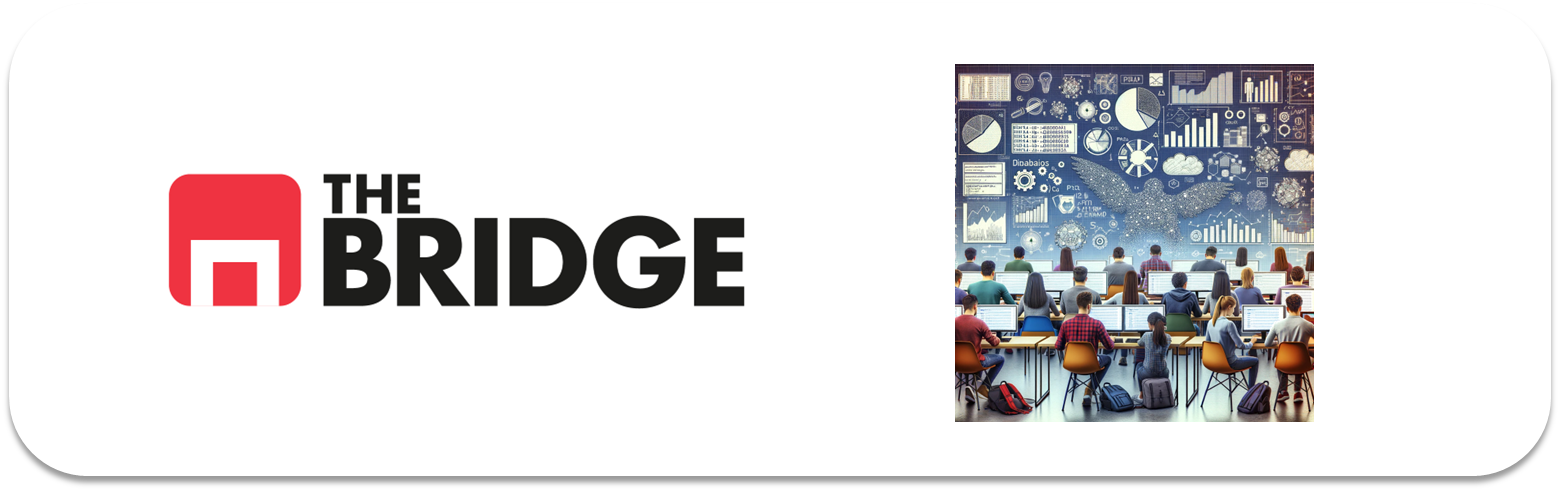

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [53]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [54]:
df_titanic = pd.read_csv('/Users/lauragarcia/Projects/DS_Online_Febr25_Exercises/04_Machine_Learning/Sprint_10/Unidad_02/Practica_Obligatoria/data/titanic.csv')

In [55]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
df_titanic_clear = df_titanic.copy()

In [57]:
# Quito las columnas que me dan valores repetidos
df_titanic_clear.drop(['class','embarked','alone','alive','deck'],axis=1, inplace= True)

In [58]:
df_titanic_clear.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [59]:
# veo que en la edad hay missing, pero no debo imputarla por ningún valor y en embark_town, faltan 2 valores, que de ejercicios anteriores sabemos que se puede competar con Southamtom, en este caso voy a elimar esas únicas dos filas para que no me interfiieran mucho
df_titanic_clear.dropna(subset=['embark_town'], inplace=True)

In [60]:
df_titanic_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   adult_male   889 non-null    bool   
 9   embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 70.3+ KB


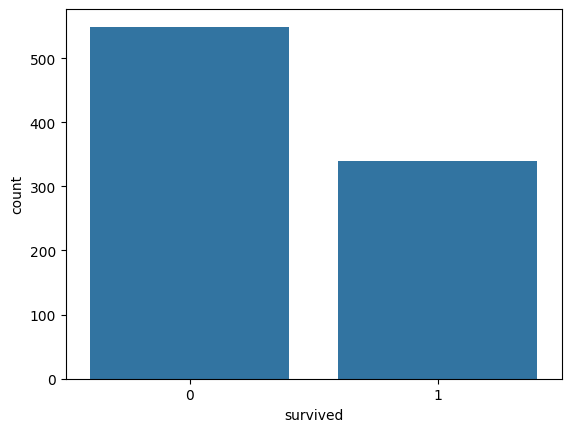

In [61]:
# Buscando y analizando la variable target
# La variable target es survived ya que tiene un valor binario de sobrevive o no.
sns.countplot(data=df_titanic_clear, x='survived');

In [62]:
# Voy a sumar las columnas parch y sibsp para saber el numero de familiares
df_titanic_clear["family_members"] = df_titanic_clear["parch"] + df_titanic_clear["sibsp"]
# elimino sibsp y parch
df_titanic_clear.drop(['sibsp', 'parch'], axis=1, inplace= True)

In [63]:
# Voy a hacer la separción en train y test y luego ya miro la correlación de la variable target con el resto
from sklearn.model_selection import train_test_split 

X = df_titanic_clear.drop(['survived'], axis=1)
y = df_titanic_clear['survived'] # nuestro target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify= df_titanic_clear['embark_town'], random_state=42) #estratifico para la ciudad de embarque y qu ehaya una distribución

In [64]:
# compruebo las proporciones en el train
X_train['embark_town'].value_counts(normalize = True)

embark_town
Southampton    0.724332
Cherbourg      0.188467
Queenstown     0.087201
Name: proportion, dtype: float64

In [65]:
# compruebo las proporciones en el test
X_test['embark_town'].value_counts(normalize = True)

embark_town
Southampton    0.724719
Cherbourg      0.191011
Queenstown     0.084270
Name: proportion, dtype: float64

In [66]:
# No son perfectas, pero son muy similares, los tendrá que valer


In [67]:
# Ahora voy a imputar los missing con las medias y modas respectivamente.
es_mujer = X_train.who == "woman"
es_hombre = X_train.who == "man"
es_ninio = X_train.who == "child" 

media_mujer = X_train.loc[es_mujer, "age"].mean()
media_hombre = X_train.loc[es_hombre, "age"].mean()
media_ninio = X_train.loc[es_ninio, "age"].mean()

es_edad_nulo = X_train.age.isna()

X_train.loc[es_mujer & es_edad_nulo, "age"] = media_mujer
X_train.loc[es_hombre & es_edad_nulo, "age"] = media_hombre
X_train.loc[es_ninio & es_edad_nulo, "age"] = media_ninio

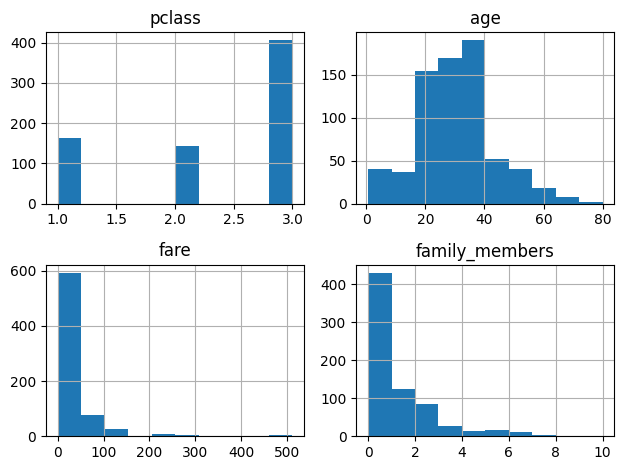

In [68]:
# Pasamos al mini-EDA
X_train.hist()
plt.tight_layout()
plt.show()

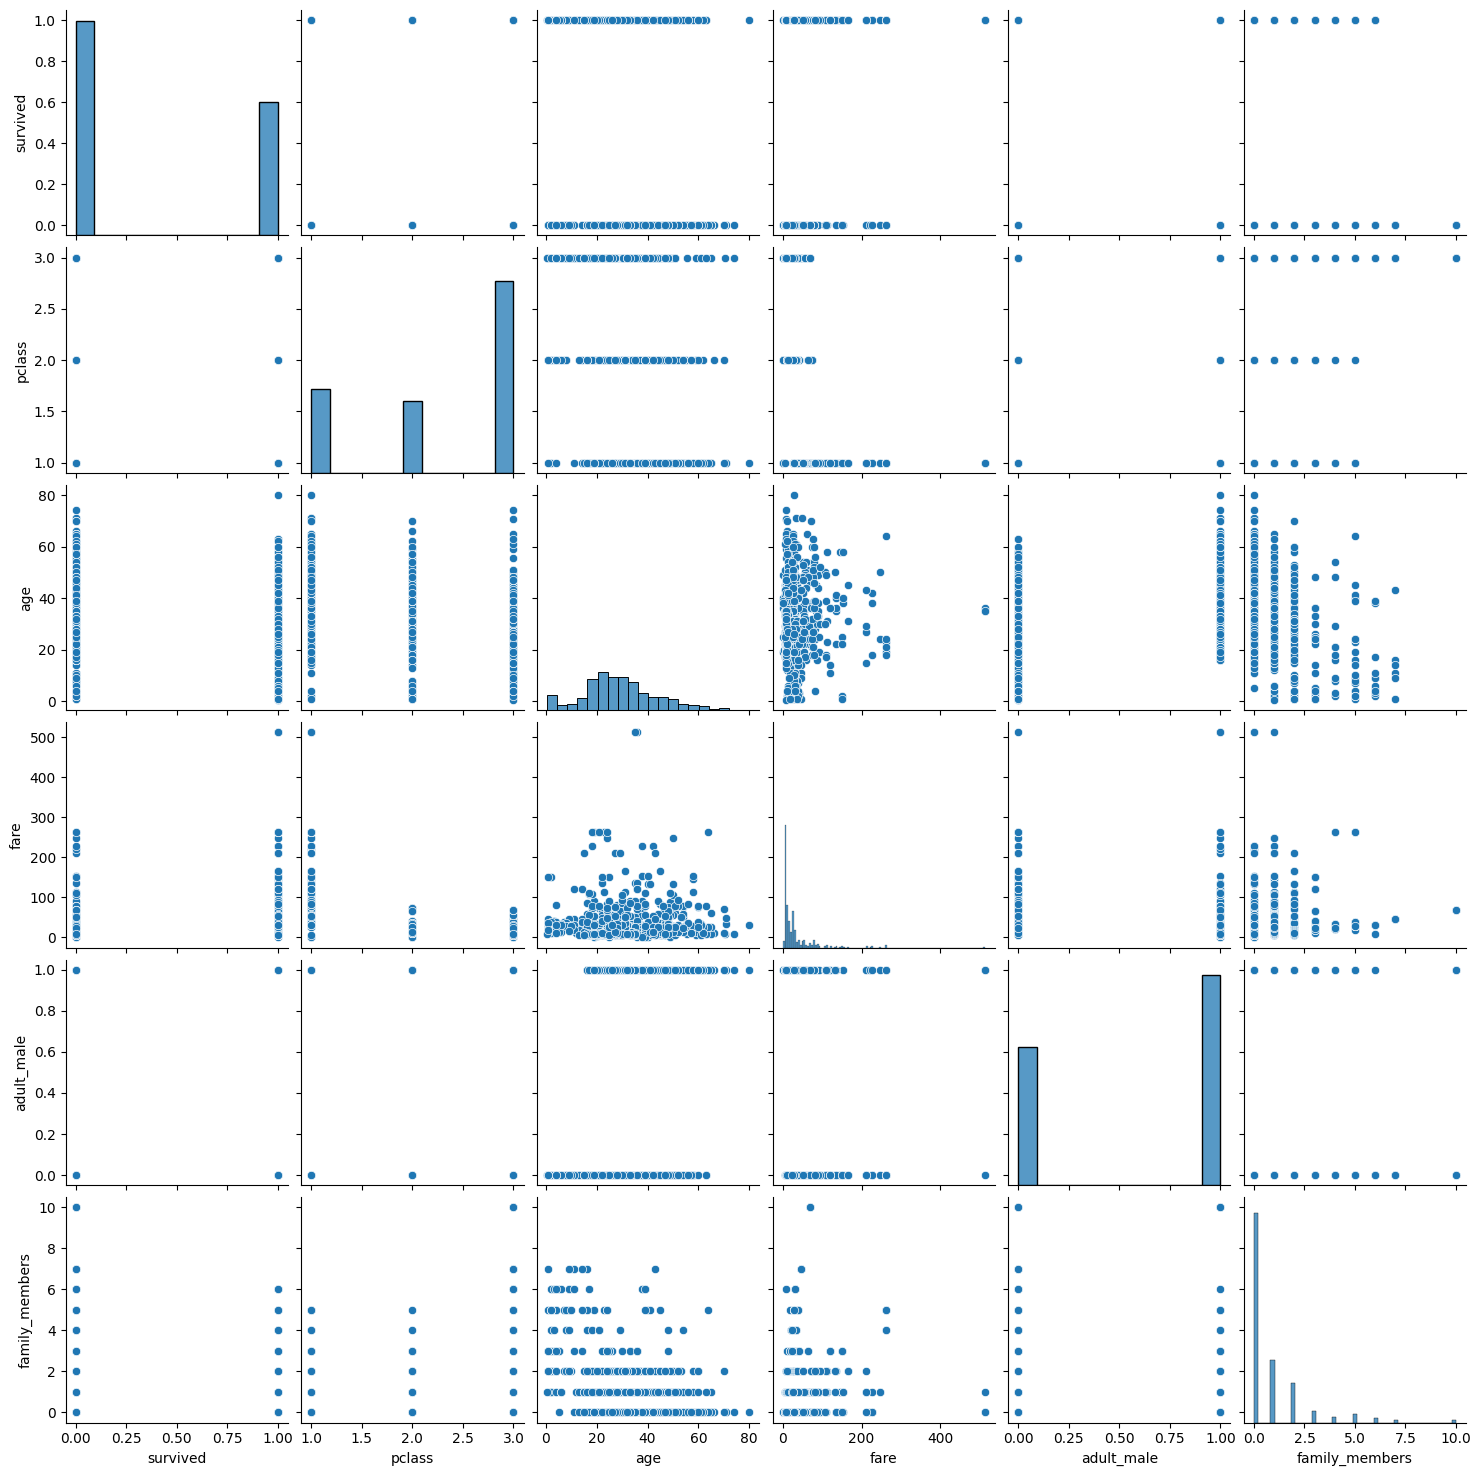

In [69]:
# De las variables numéricas pordemos ver están en unidades diversas y que ademas no tienen distribuciones normales por lo que habrá que transformarlas, pero antes voy a hacer un gráfico en el que ver cada variable con la target
sns.pairplot(df_titanic_clear)

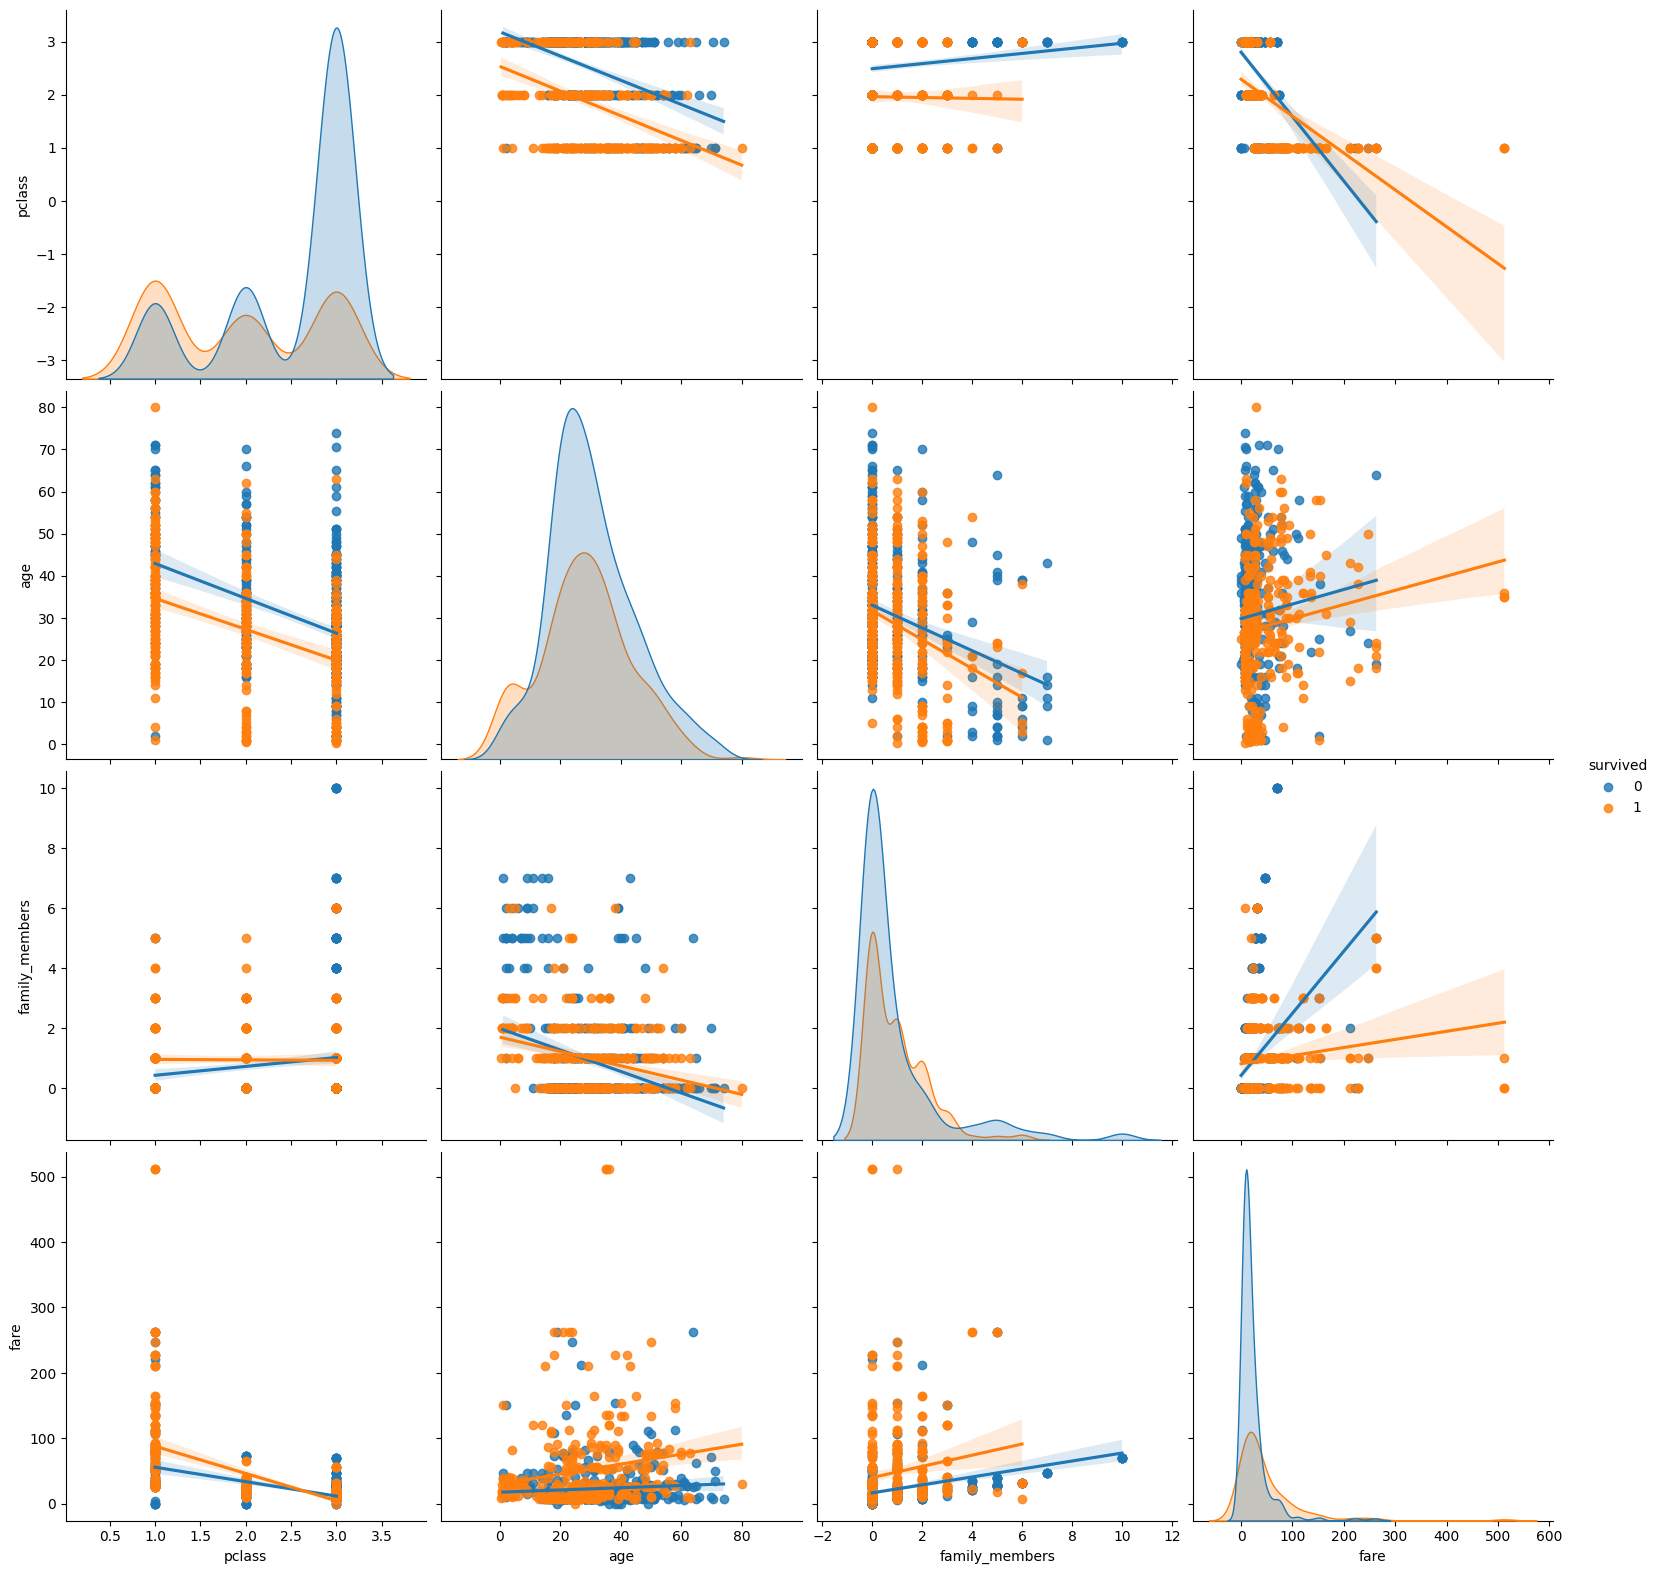

In [70]:
sns.pairplot(df_titanic_clear,
            hue='survived',
            height=4,
            vars=["pclass", "age","family_members", "fare"],
            kind='reg'); # "reg" de regresión lineal

In [71]:
# Parece que todas las variables tienen cierta relación con la supervivencia, pero cada una a su manera.
# Me voy a quedar con las variables numéricas y las tendré que modificar para que se ajusten más a una campana de gauss
features = X_train.columns.to_list()
print(features)

['pclass', 'sex', 'age', 'fare', 'who', 'adult_male', 'embark_town', 'family_members']


In [72]:
# Voy a separar las numericas
features_num = X_train[['pclass', 'age', 'fare', 'family_members']]

In [76]:
for col in features_num:
    X_train[col] = X_train[col].apply(np.log)


In [77]:
X_train = X_train[features_num]
X_test = X_test[features_num]

ValueError: Boolean array expected for the condition, not int64

In [78]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(max_iter=10000) 

reg_log.fit(X_train, y_train) 

ValueError: could not convert string to float: 'male'